## Communities and Crime Data Set

En este conjunto de datos exploraremos algunos modelos de regresión lineal. La idea es poder determinar el comportamiento de la variable objetivo elegida con ayuda de algoritmos de regresión. [Aquí](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) encuentra el origen de los datos a estudiar.

### Importando las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
import os
PROJ_DIR = os.path.abspath(os.curdir)
print(PROJ_DIR)

C:\Users\cryst\Documents\machine_learning_course\crime_problem


### Leyendo los archivos de trabajo

In [3]:
data_file = os.path.join(PROJ_DIR, "data", "raw", "communities.data")
data_name = os.path.join(PROJ_DIR, "data", "raw", "communities.names")

In [4]:
f = open(data_name, "r")
columnas = []
data=f.readlines()
for i in range(len(data)):
    if data[i].startswith('@attribute'):
        columnas.append(data[i].split()[1])   

In [5]:
comunidades = pd.read_csv(data_file, names=columnas, na_values=['?'])
comunidades.head(3)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43


In [6]:
comunidades = comunidades.drop(['state', 'county', 'community', 'communityname', 'fold'], axis = 1)

In [7]:
comunidades.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


### Analizando la información de la tabla

In [8]:
comunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(123)
memory usage: 1.9 MB


In [9]:
comunidades.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


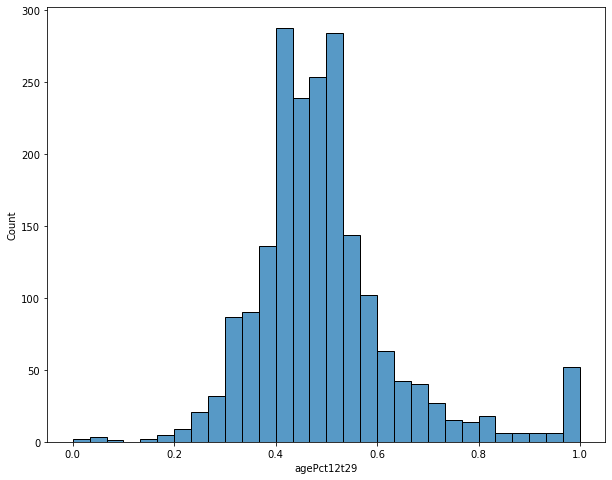

In [10]:
sns.histplot(data = comunidades, x = 'agePct12t29', bins = 30)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
st_scaler = StandardScaler()
st_scaler.fit(np.array(comunidades[['agePct12t29']]))
age_st = st_scaler.transform(np.array(comunidades[['agePct12t29']]))

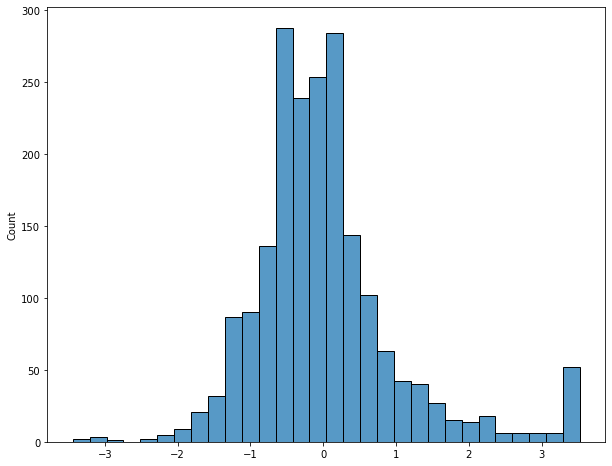

In [12]:
sns.histplot(x = age_st.reshape(-1,), bins = 30)
plt.show()

### Grupos de Selección

Una parte importante a la hora de entrenar un modelo, es tomar una parte de la muestra para entrenamiento y otra para evaluación. El valor que se toma para una o para otra depende completamente de los datos que se estén estudiando. Además, a veces se puede necesitar un conjunto adicional de datos, llamado conjunto de validación. Dada la importancia de esta actividad para el modelo, Scikit Learn tiene implementada la función train_test_split para cumplirla:

In [13]:
X = comunidades.drop('ViolentCrimesPerPop', axis = 1)
y = comunidades['ViolentCrimesPerPop']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

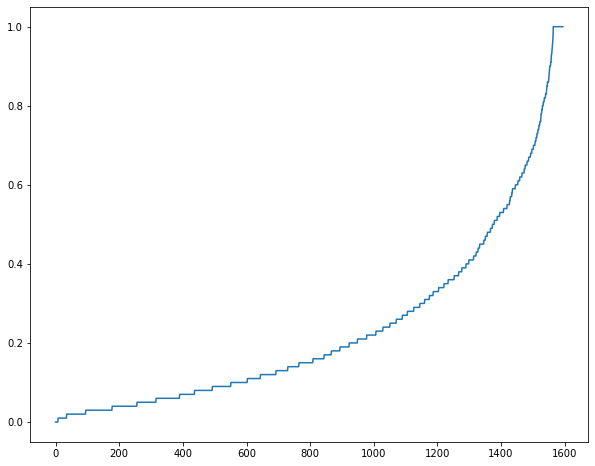

In [15]:
sns.lineplot(x = range(len(y_train)),y = np.sort(y_train))
plt.show()

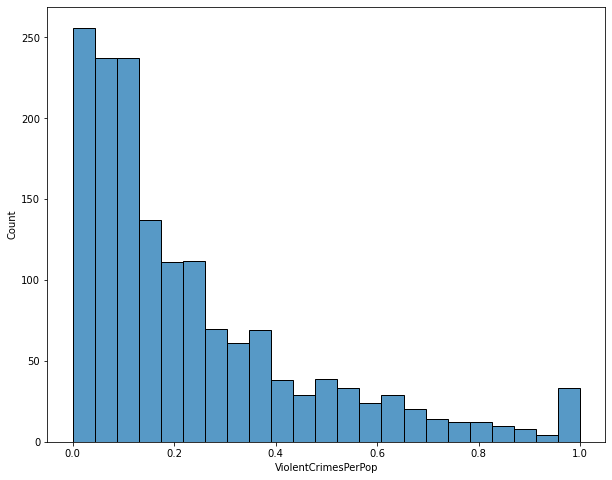

In [16]:
sns.histplot(x = y_train)
plt.show()

### Imputando los datos para el modelo

In [17]:
nulos = X_train.isnull().mean().to_frame().rename({0: '% Nulos'}, axis = 1)
nulos = nulos.sort_values('% Nulos', ascending=False)
nulos.head(20)

,% Nulos
PolicBudgPerPop,0.840125
PctPolicAsian,0.840125
LemasSwornFT,0.840125
LemasSwFTPerPop,0.840125
LemasSwFTFieldOps,0.840125
LemasSwFTFieldPerPop,0.840125
LemasTotalReq,0.840125
LemasTotReqPerPop,0.840125
PolicPerPop,0.840125
RacialMatchCommPol,0.840125


In [18]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
imp.fit(X_train)
X_train_tr = pd.DataFrame(imp.transform(X_train), columns=X_train.columns.tolist())

In [19]:
X_train_tr.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.01,0.35,0.01,0.98,0.03,0.01,0.39,0.44,0.28,0.55,...,0.25,0.12,0.03,0.02,0.07,0.03,0.76,0.5,0.0,0.15
1,0.02,0.35,0.23,0.66,0.03,0.05,0.38,0.38,0.21,0.63,...,0.25,0.14,0.04,0.01,0.07,0.03,0.76,0.5,0.0,0.15
2,0.00,0.40,0.01,0.81,0.24,0.28,0.51,0.71,0.53,0.34,...,0.25,0.01,0.29,0.21,0.07,0.03,0.76,0.5,0.0,0.15
3,0.06,0.34,0.06,0.85,0.07,0.22,0.40,0.46,0.28,0.38,...,0.25,0.05,0.22,0.02,0.07,0.03,0.76,0.5,0.0,0.15
4,0.04,0.56,0.03,0.89,0.31,0.04,0.34,0.42,0.27,0.31,...,0.25,0.09,0.08,0.12,0.07,0.03,0.76,0.5,0.0,0.15


In [20]:
nulos_tr = X_train_tr.isnull().mean().to_frame().rename({0: '% Nulos'}, axis = 1)
nulos_tr = nulos_tr.sort_values('% Nulos', ascending=False)
nulos_tr.head(20)

,% Nulos
population,0.0
PctForeignBorn,0.0
NumInShelters,0.0
MedOwnCostPctIncNoMtg,0.0
MedOwnCostPctInc,0.0
MedRentPctHousInc,0.0
MedRent,0.0
RentHighQ,0.0
RentMedian,0.0
RentLowQ,0.0


### Modelación

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, mean_absolute_percentage_error

#### Regresión lineal múltiple

In [22]:
lr = LinearRegression()
lr.fit(X_train_tr, y_train)
y_train_pred = lr.predict(X_train_tr)

In [23]:
print(f'mean_squared_error: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'r2_score: {r2_score(y_train, y_train_pred):.3f}')
print(f'explained_variance_score: {explained_variance_score(y_train, y_train_pred):.3f}')
print(f'mean_absolute_error: {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_train, y_train_pred):.3f}')

mean_squared_error: 0.015
r2_score: 0.706
explained_variance_score: 0.706
mean_absolute_error: 0.088
mean_absolute_percentage_error: 2126187948571.652


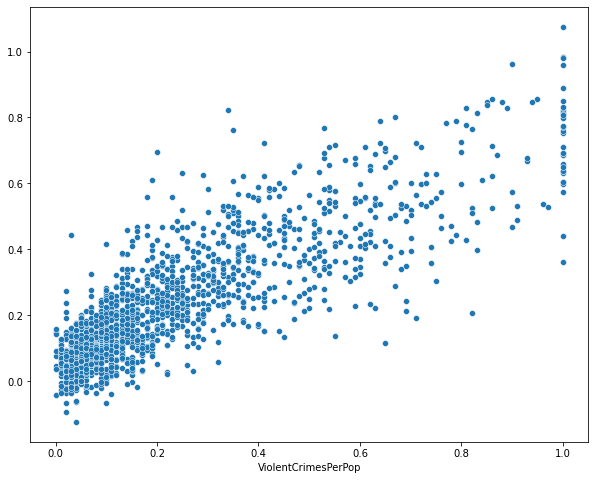

In [24]:
sns.scatterplot(x= y_train, y = y_train_pred)
plt.show()

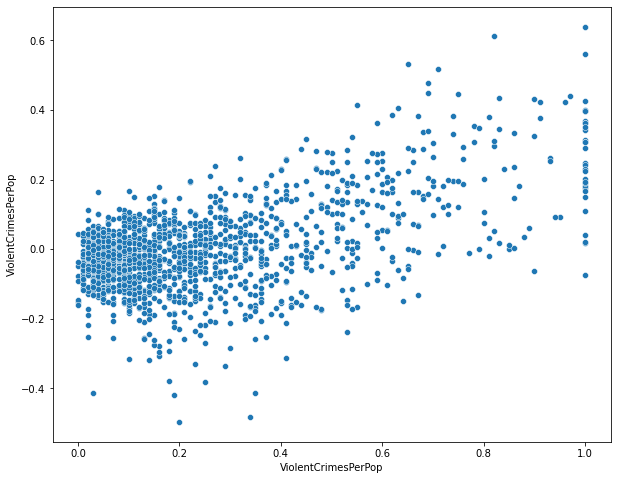

In [25]:
sns.scatterplot(x= y_train, y = (y_train - y_train_pred))
plt.show()

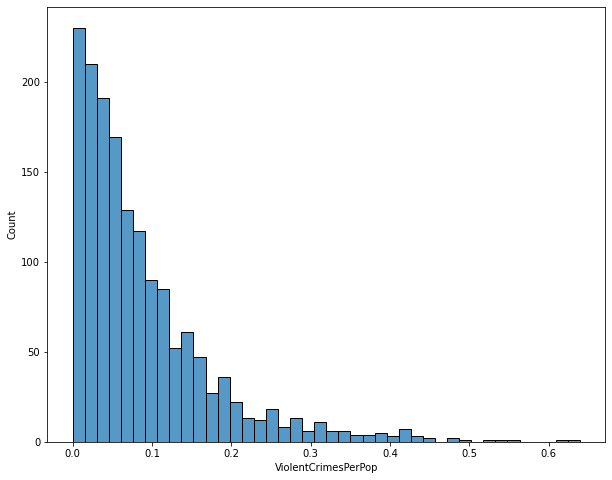

In [26]:
sns.histplot(x = (y_train-y_train_pred).abs());

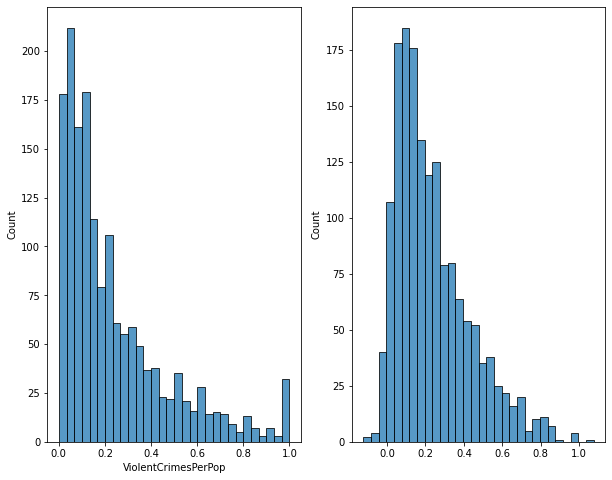

In [27]:
fig, axes = plt.subplots(1,2)
sns.histplot(x = y_train, bins = 30, ax= axes[0]);
sns.histplot(x = y_train_pred, bins = 30, ax=axes[1]);

In [28]:
importancia = pd.DataFrame({
        'columna': X_train_tr.columns.tolist(),
        'coeficiente': lr.coef_
}).sort_values('coeficiente', ascending=False)

importancia.head(10)

,columna,coeficiente
103,PolicPerPop,31.224623
99,LemasSwFTFieldPerPop,0.879757
64,PersPerOccupHous,0.671066
38,MalePctDivorce,0.464262
58,PctRecImmig8,0.396324
19,medFamInc,0.360402
27,NumUnderPov,0.343925
73,PctHousOwnOcc,0.242848
90,NumStreet,0.241245
33,PctEmploy,0.223984


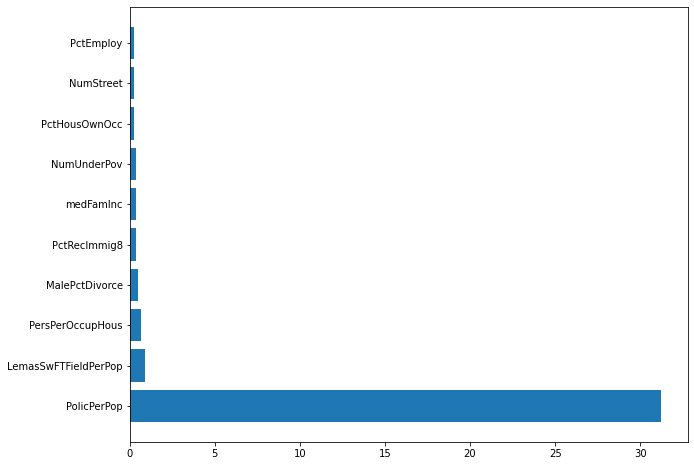

In [29]:
plt.barh(y = importancia['columna'].head(10), width=importancia['coeficiente'].head(10))
plt.show()

#### Regresión Lasso

In [30]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_tr, y_train)
y_train_pred = lasso.predict(X_train_tr)

In [31]:
print(f'mean_squared_error: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'r2_score: {r2_score(y_train, y_train_pred):.3f}')
print(f'explained_variance_score: {explained_variance_score(y_train, y_train_pred):.3f}')
print(f'mean_absolute_error: {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_train, y_train_pred):.3f}')

mean_squared_error: 0.016
r2_score: 0.693
explained_variance_score: 0.693
mean_absolute_error: 0.089
mean_absolute_percentage_error: 1761490780405.401


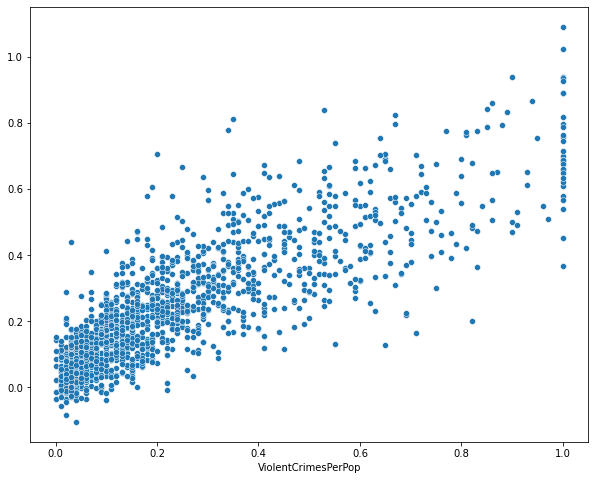

In [32]:
sns.scatterplot(x= y_train, y = y_train_pred)
plt.show()

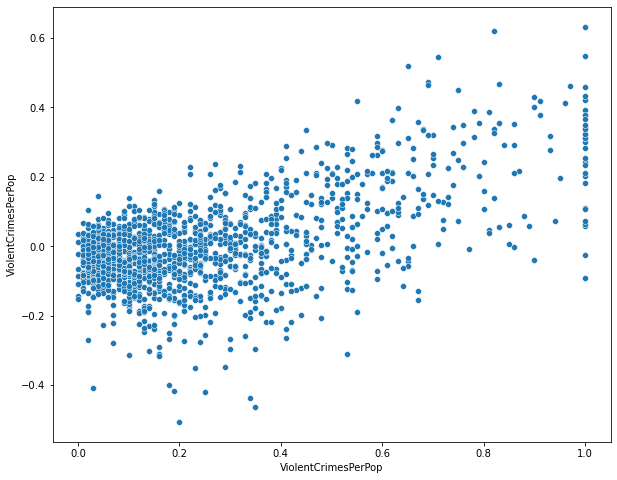

In [33]:
sns.scatterplot(x= y_train, y = (y_train - y_train_pred))
plt.show()

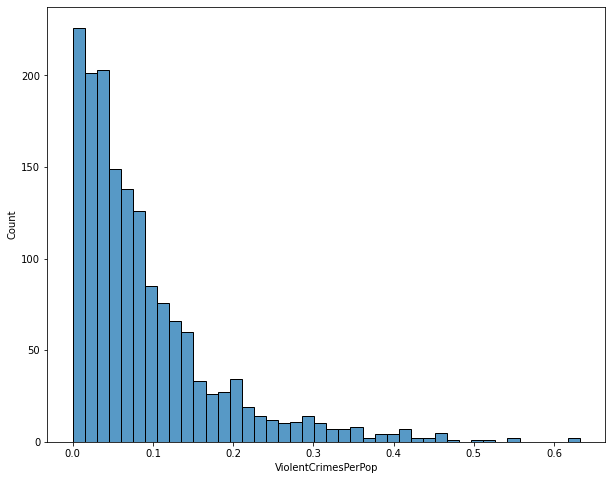

In [34]:
sns.histplot(x = (y_train-y_train_pred).abs());

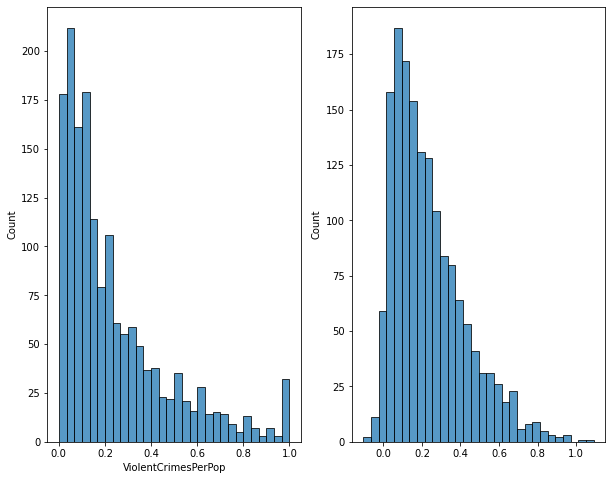

In [35]:
fig, axes = plt.subplots(1,2)
sns.histplot(x = y_train, bins = 30, ax= axes[0]);
sns.histplot(x = y_train_pred, bins = 30, ax=axes[1]);

In [36]:
importancia = pd.DataFrame({
        'columna': X_train_tr.columns.tolist(),
        'coeficiente': lasso.coef_
}).sort_values('coeficiente', ascending=False)

importancia.head(10)

,columna,coeficiente
71,HousVacant,0.200206
90,NumStreet,0.198961
2,racepctblack,0.182034
85,MedRent,0.136500
68,PctPersDenseHous,0.130579
38,MalePctDivorce,0.128341
64,PersPerOccupHous,0.119359
50,PctIlleg,0.105933
33,PctEmploy,0.084330
102,PolicReqPerOffic,0.082333


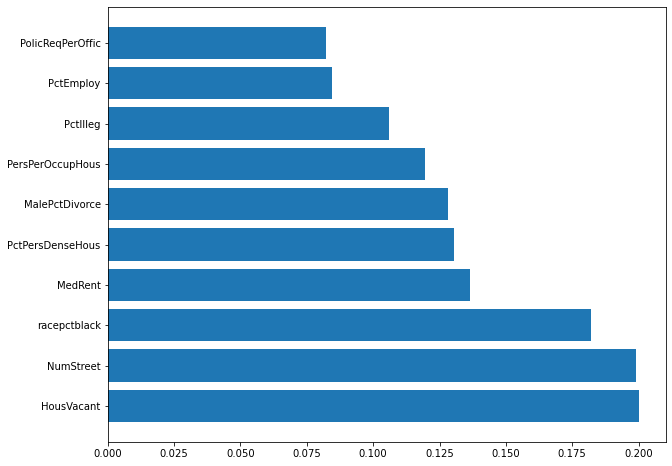

In [37]:
plt.barh(y = importancia['columna'].head(10), width=importancia['coeficiente'].head(10))
plt.show()

#### Regresión Ridge

In [38]:
ridge = Ridge(alpha=0.0001)
ridge.fit(X_train_tr, y_train)
y_train_pred = ridge.predict(X_train_tr)

In [39]:
print(f'mean_squared_error: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'r2_score: {r2_score(y_train, y_train_pred):.3f}')
print(f'explained_variance_score: {explained_variance_score(y_train, y_train_pred):.3f}')
print(f'mean_absolute_error: {mean_absolute_error(y_train, y_train_pred):.3f}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_train, y_train_pred):.3f}')

mean_squared_error: 0.015
r2_score: 0.706
explained_variance_score: 0.706
mean_absolute_error: 0.088
mean_absolute_percentage_error: 2127785079518.530


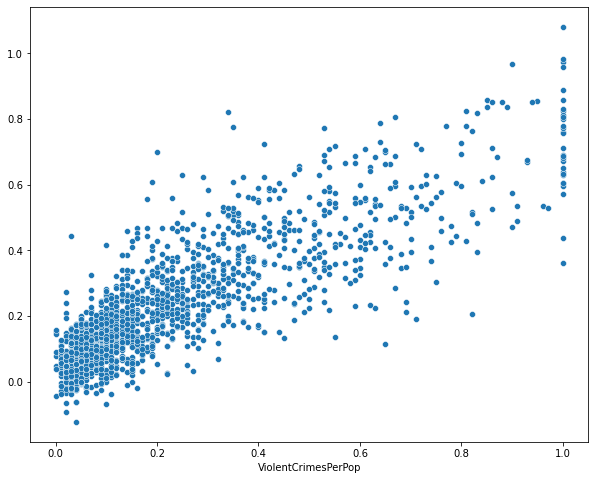

In [40]:
sns.scatterplot(x= y_train, y = y_train_pred)
plt.show()

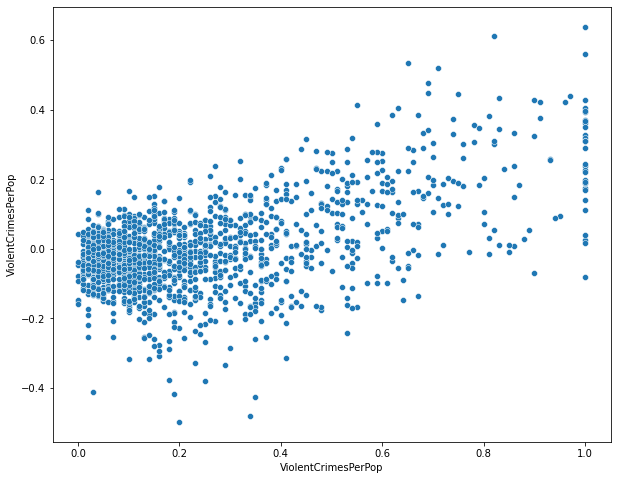

In [41]:
sns.scatterplot(x= y_train, y = (y_train - y_train_pred))
plt.show()

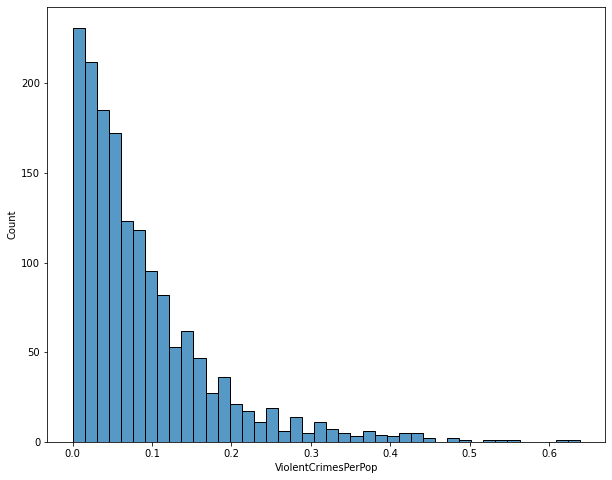

In [42]:
sns.histplot(x = (y_train-y_train_pred).abs());

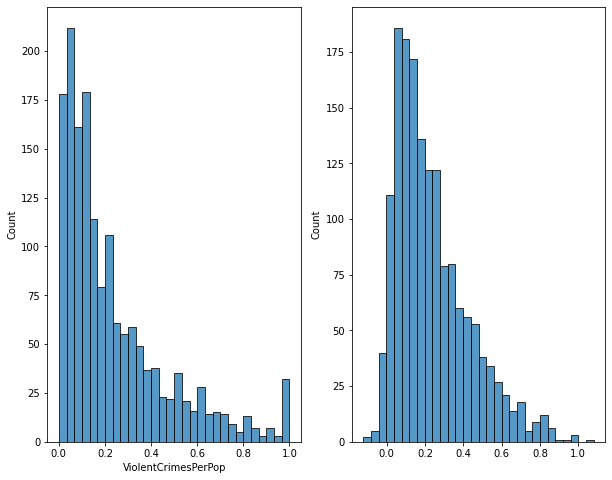

In [43]:
fig, axes = plt.subplots(1,2)
sns.histplot(x = y_train, bins = 30, ax= axes[0]);
sns.histplot(x = y_train_pred, bins = 30, ax=axes[1]);

In [44]:
importancia = pd.DataFrame({
        'columna': X_train_tr.columns.tolist(),
        'coeficiente': ridge.coef_
}).sort_values('coeficiente', ascending=False)

importancia.head(10)

,columna,coeficiente
103,PolicPerPop,8.964008
99,LemasSwFTFieldPerPop,0.804809
64,PersPerOccupHous,0.668286
38,MalePctDivorce,0.465118
58,PctRecImmig8,0.397036
19,medFamInc,0.365102
27,NumUnderPov,0.307403
73,PctHousOwnOcc,0.253218
90,NumStreet,0.237258
85,MedRent,0.230757


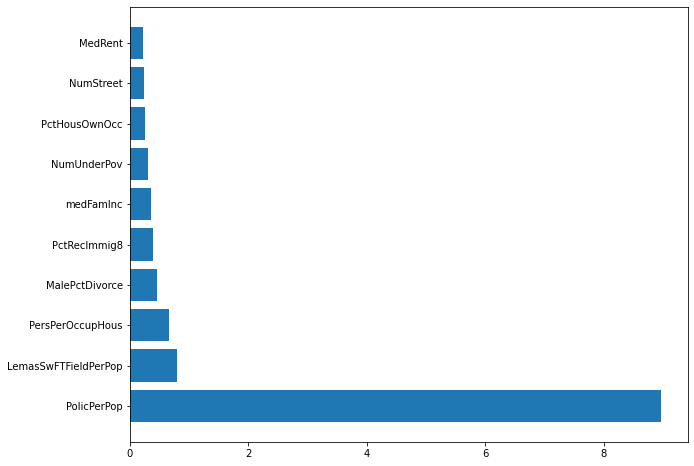

In [45]:
plt.barh(y = importancia['columna'].head(10), width=importancia['coeficiente'].head(10))
plt.show()